<h1>SWaT: Creación del modelo</h1>

<h2>Introducción</h2>

En esta libreta creamos el modelo correspondiente con los datos obtenidos de la libreta **SWaT: Preparando los datos**. Explicaremos los pasos necesarios para crear un modelo de detección de anomalías para el DataSet SWaT una vez ya preprocesado y justificaremos las decisiones que hemos tomado.

<h2>1. Cargando los datos ya preparados</h2>

En esta sección cargamos los .csv que genereamos en la libreta anterior para poder trabajar con los datos del dataset SWaT:

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")

In [3]:
validation = pd.read_csv("val.csv")

In [4]:
test = pd.read_csv("test.csv")

Comprobamos si los datos se han cargado de manera correcta:

In [5]:
train

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_1,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Normal/Attack
0,0.894061,0.145253,0.980632,0.966672,0.817110,0.964381,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,0.888111,0.144064,0.981095,0.965737,0.818515,0.966238,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
2,0.884144,0.144540,0.981095,0.964336,0.822205,0.965394,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,0.883677,0.143826,0.981095,0.964336,0.823259,0.965225,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
4,0.884611,0.143112,0.981095,0.964959,0.824313,0.966069,0.000037,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295995,0.000000,0.701880,0.988616,0.969320,0.057625,0.240040,0.000037,0.0,0.911708,0.001927,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
295996,0.000000,0.701285,0.989337,0.969320,0.057273,0.239534,0.000037,0.0,0.913510,0.001909,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
295997,0.000000,0.699857,0.989646,0.969320,0.056395,0.241222,0.000037,0.0,0.915023,0.001897,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
295998,0.000000,0.698549,0.989749,0.969320,0.057800,0.240547,0.000037,0.0,0.916826,0.001889,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0


In [6]:
validation

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_1,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Normal/Attack
0,0.000000,0.695099,0.989594,0.965893,0.055868,0.240209,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,0.000000,0.692482,0.989337,0.968229,0.054287,0.241391,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
2,0.000000,0.690221,0.989337,0.968541,0.055341,0.240378,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,0.000000,0.688913,0.989337,0.968541,0.055341,0.241897,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
4,0.000000,0.687247,0.989337,0.970565,0.056219,0.241897,0.000037,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98995,0.896278,0.110992,0.981713,0.960754,0.742444,0.731937,0.000073,0.062149,0.071088,0.001501,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
98996,0.892078,0.110754,0.981713,0.960754,0.742795,0.732612,0.000073,0.061966,0.071199,0.001490,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
98997,0.886944,0.110516,0.982743,0.960754,0.743147,0.733456,0.000073,0.062001,0.071265,0.001493,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
98998,0.884611,0.110635,0.982949,0.960754,0.744201,0.732443,0.000073,0.062238,0.071426,0.001501,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0


In [7]:
test

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_1,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Normal/Attack
0,0.884144,0.110397,0.982949,0.960754,0.744025,0.732950,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,0.891145,0.110516,0.982949,0.960754,0.744025,0.732781,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
2,0.906779,0.110397,0.981713,0.957951,0.745431,0.732106,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
3,0.923230,0.110754,0.981713,0.957951,0.746836,0.731768,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
4,0.935947,0.112301,0.982022,0.957951,0.748066,0.733625,0.000073,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449914,0.932563,0.100404,0.988616,0.992369,0.824664,0.797940,0.000000,0.063371,0.058520,0.001667,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
449915,0.928596,0.103022,0.988616,0.992369,0.824840,0.799290,0.000000,0.063253,0.059587,0.001660,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
449916,0.922179,0.103854,0.988873,0.989099,0.823435,0.799796,0.000000,0.063258,0.060898,0.001654,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
449917,0.918446,0.103973,0.988873,0.987385,0.823259,0.801484,0.000000,0.063259,0.062191,0.001647,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0


<h3>1.1. División de los datos</h3>

Dividimos los datos en función de si se trata de la variable clase o las variables predictoras::

In [8]:
X_train = train.drop(columns = "Normal/Attack")
y_train = train["Normal/Attack"]

In [9]:
X_validation = validation.drop(columns = "Normal/Attack")
y_validation = validation["Normal/Attack"]

In [10]:
X_test = test.drop(columns = "Normal/Attack")
y_test = test["Normal/Attack"]

<h2>2. Creación del modelo</h2>

En esta sección explicaremos el modelo que hemos elegido (con su correspondiente justificación) debido a la naturaleza del problema y lo desarrollaremos paso a paso:

<h3>2.1. Eligiendo el modelo</h3>

Para los problemas de detección de anomalías, se recomienda utilizar un modelo de regresión de Deep Learning aplicado a una ventana W porque:

- Modela comportamientos más complejos que el Machine Learning.
- Se adecúa perfectamente a modelar datos de series temporales.

En cuanto al tipo de problema, se debe optar por regresión en vez de clasificación debido a:

- Señales y sensores de ICS siguen un patrón temporal fácilmente modeable por un regresor.
- Adoptar un modelo de regresión junto a un umbral de anomalía genera información sobre el sensor que la causa, favoreciendo la interpretabilidad.

En cuanto al diseño de nuestro modelo, este recibirá una serie temporal con este formato: $
(x_{0}, x_{1}, \dots, x_{n-1})
$.  A su vez,  $(y_{n+h}, \dots, y_{n+h+m})$ es la salida del modelo, dónde n es la longitud de la ventana, m es número de predicciones futuras a realizar, h es el horizonte de predicción.

<h3>2.2. Eligiendo hiperparámetros</h3>

El siguiente paso es elegir los hiperparámetros del modelo. Estos se pueden dividir en dos grupos:

- Hiperparámetros relacionados con los **datos de entrada**.
- Hiperparámetros exclusivos del modelo de **Deep Learning**.

Para configurar los hiperparámetros relacionados con los datos de entrada debemos tener en cuenta:

- **n**: La ventana debe ser lo suficientemente grande para capturar el comportamiento del sistema. Se recomienda graficar las características para observar comportamientos repetitivos.
- **h**: El horizonte de predicción especifica el paso de tiempo en el futuro a partir del cual el modelo comienza a predecir. Se sugiere probar diferentes valores para verificar que el modelo de Deep Learning está generalizando, en vez de replicar el último valor de entrada.
- **m**: El número de pasos de tiempo predichos debe ajustarse según el escenario específico. En general, este valor se establecerá en uno.

Para implementar el modelo, utilizaremos la libería **pytorch**. Para cargar nuestros datos, tenemos que usar un dataset de la misma librería, por lo que creamos una clase personalizada para nuestro dataset. En esta clase, implementaremos un método que devuelva lotes de datos (para no tener mucha información a la vez en memoria) en tuplas x e y, representando series temporales hasta hasta $(y_{n+h}, \dots, y_{n+h+m})$:.

Primero, añadimos a nuestro código las librerías necesarias:

In [11]:
import torch
from torch.utils.data import Dataset
import numpy as np

Posteriormente creamos la clase personaliza de datos llamada **TimeSeriesDataset**:

In [12]:
torch.cuda.is_available()

True

In [13]:
torch.cuda.device_count()

1

In [14]:
torch.cuda.current_device()

0

In [15]:
class TimeSeriesDataset(Dataset):
    def __init__(self, data, n, h, m, overlap = 1):
        """
        Parámetros:
            data: Serie temporal, es un DataFrame.
            n: Tamaño de la ventana, es un entero.
            h: Horizonte de predicción, es un entero.
            m: Número de predicciones futuras, es un entero.
        """

        #lo converitmos a float32 para que el entrenamiento sea más rápido
        if isinstance(data, np.ndarray):
            self.data = torch.tensor(data, dtype=torch.float32)
        else:
            self.data = torch.tensor(data.values, dtype=torch.float32)

        self.n = n
        self.h = h
        self.m = m
        self.overlap = overlap
        
        #cantidad de muestras posibles del dataset
        self.num_samples = (len(self.data) - (n + h + m) + 1)// self.overlap

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        """
        getitem: Devuelve la muestra correspondiente al índice dado.

        Devuelve:
            - x: ventana de tamaño n.
            - y: un valor futuro después de un horizonte h (tamaño 1).
        """
        real_idx = idx*self.overlap
        #ventana de entrada de tamaño n, con lo que se entrena
        x = self.data[real_idx:real_idx+self.n]

        #queremos predecir el valor[n+m+h], por lo que lo comparamos con el real
        y = self.data[real_idx+self.n+self.h:real_idx+self.n+self.h+self.m].reshape(-1)

        return x, y

A continuación, configuramos los hiperparámetros de los datos de entrada y dejamos preparados nuestros generadores de datos. Hemos decidido usar los siguientes hiperparámetros:

- **n = 120**: Con una ventana de 120 segundos capturamos suficiente información sobre el pasado más reciente de los diferentes sensores y actuadores.
- **h = 10**: Establecemos un valor mayor que uno debido a que las redes neuronales tienden a reproducir el último valor cuando el horizonte de predicción es cercano a la entrada.
- **m = 1**: Solo nos interesa predecir el siguiente valor, por lo que lo dejamos a uno.

En cuanto al tamaño de los lotes de nuestro generador, hemos decidido usar un batch de 5000 instancias, es decir, cada vez que el generador nos de datos será de 5000 en 5000:

In [16]:
n = 120  #tamaño de la ventana
h = 10   #horizonte de predicción
m = 1    #número de predicciones futuras
#batch_size = 295870

#creación de los datasetsjupyter notebook

train_dataset = TimeSeriesDataset(X_train, n, h, m)
val_dataset = TimeSeriesDataset(X_validation, n, h, m)

#creación de los dataloaders
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    num_workers=2,      #para cargar los datos más rápido
    pin_memory=True     #optimiza la transferencia de los datos a la GPU
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    num_workers=2,      #para cargar los datos más rápido
    pin_memory=True     #optimiza la transferencia de los datos a la GPU
)

<h3>2.3. Buscando los mejores hiperparámetros</h3>

Una vez que hemos elegido el modelo y hemos establecido los hiperparámetros de los datos de entrada, debemos de entrenar y hacer fine-tuning al modelo. En el artículo que estamos siguiendo se recomiendan dos enfoques:

- **Grid Search**: Realiza una búsqueda exhaustiva en la que se prueban todas las posibles configuraciones de hiperparámetros y se queda con la mejor combinación. Es muy costosa en cuanto a tiempo pero asegura los mejores resultados dentro de los hiperparámetros definidos.
- **Random Search**: Prueba valores aleatorios a partir de una lista de hiperparámetros predefinidos.

En nuestro caso, realizaremos **Grid Search** y probaremos las posibles configuraciones de hiperparámetros con los datos de train. Para comprobar que tan buenas son esas configuraciones, debemos evaluarlas con los datos de validación. Para ello, como estamos en un problema de regresión, tenemos varios opciones para medir que tan buenas son:

- Utilizar **MSE (Error Cuadrático Medio)** como error: Penaliza errores más grandes, útil para detectar anomalías más fuertes.
- Utilizar **MSA (Error Absoluto Medio)** como error: Más robusto ante valores atípicos, útil si los datos tienen rudio.

Nosotros utilizaremos el **MSE**, y nos quedaremos con el conjunto de hiperparámetros que tenga <u>menor error</u>.

A continuación, mostramos los pasos necesarios para realizar el **Grid Search** correspondiente.

Primero instalamos las librerías necesarias:

In [17]:
import torch.nn as nn

Creamos la función para construir el modelo. Algo que se debe tener en cuenta es que hemos decidido usar capas LSTM en este problema de detección de anomalías con serires temporales por las siguientes razones:

- Las Redes Densas o RNNs estándar no pueden recordar información muy antigua debido al problema de <u>desvanecimiento del gradiente</u>.

- Las celdas de las **LSTM (Long Short-Term Memory)** presentan puertas que permiten recordar información mucho más anterior que en una recurrente, consiguiendo capturar mejores patrones de largo plazo. Además, evita el problema de desvanecimiento del gradiente.

- las celdas LSTM presentan mejor resultado que las GRU (Gated Recurrent Units), ya que son una versión simplifiada de las LSTM, aunque son más rápidas. Preferimos obtener mejor rendimiento a pesar de un mayor coste de entrenamiento.


Nuestra red nueronal recibirá lotes de 5000 filas (batch) con todas las columnas del dataset, por lo que el tamaño de entrada de nuestra red deberá tener tamaño igual al número de características. La red se entrenará con los datos hasta la ventana de tiempo $ \text{data}[n] $, y predecirá $\text{data}[n+h+n]$. De esta manera, nuestro regresor devolverá una instancia con el valor predicho para todos los sensores y actuadores del dataset. Posteriormente, calcularemos el error con el valor real en ese instante de tiempo.


Esta función recibe como parámetro la cantidad de capas y neuronas por capa LSTM y capa densa, además de la función de activación correspondiente:

In [18]:
class LSTMPredictor(nn.Module):
        def __init__(self, input_size, lstm_neurons, dense_neurons, activation, output_size):
            super(LSTMPredictor, self).__init__()
    
            self.lstm_layers = nn.ModuleList()
            self.dense_layers = nn.ModuleList()
            #self.dropout = nn.Dropout(0.1) #dropout de 0.1 para evitar alto recall
    
            activations = {
                'relu': nn.ReLU(),
                'sigmoid': nn.Sigmoid()
            }
            self.activation = activations.get(activation, nn.ReLU())  # ReLU por defecto
    
            #para agregar las capas LSTM
            for i in range(len(lstm_neurons)):
                input_dim = input_size if i == 0 else lstm_neurons[i-1]
                self.lstm_layers.append(nn.LSTM(input_dim, lstm_neurons[i], batch_first=True))
    
            #para agregar las capas densas
            for i in range(len(dense_neurons)):
                input_dim = lstm_neurons[-1] if i == 0 else dense_neurons[i-1]
                self.dense_layers.append(nn.Linear(input_dim, dense_neurons[i]))
    
            #para generar la capa de salida
            self.output_layer = nn.Linear(dense_neurons[-1], output_size)

            #guardar la media, la desviación estándar y los errores en validación
            self.register_buffer("train_mean", torch.tensor(0.0))
            self.register_buffer("train_std", torch.tensor(1.0))
            self.register_buffer("val_errors", torch.tensor([]))
    
        def forward(self, x):
            #pasa por las capas LSTM
            for lstm in self.lstm_layers:
                x, _ = lstm(x)
                #x = self.dropout(x) #después de cada capa LSTM hacemos dropout
            #tomamos el último estado
            x = x[:, -1, :]
    
            #pasa por las capas densas
            for dense in self.dense_layers:
                x = self.activation(dense(x))
                #x = self.dropout(x) #despues de cada capa Densa hacemos dropout
            #capa de salida
            x = self.output_layer(x)
            return x

In [19]:
def build_model(input_size, lstm_neurons, dense_neurons, activation, output_size):
    """
    build_model: Construye un modelo LSTM en PyTorch para regresión de series temporales.

    Parámetros:
        input_size: Número de características de entrada, es un entero.
        lstm_neurons: Lista con el número de neuronas en cada capa LSTM, es una lista.
        dense_neurons: Lista con el número de neuronas en cada capa densa, es una lista.
        activation: Función de activación de las capas densas ('relu', 'sigmoid'), es una lista.
        output_size: Número de características de salida, es un entero.

    Devuelve:
        Modelo preparado para entrenar.
    """
    return LSTMPredictor(input_size, lstm_neurons, dense_neurons, activation, output_size)


El siguiente paso que debemos realizar es configurar el espacio de búsqueda de hiperparámetros. Para ello, vamos a crear un diccionario en el que vamos a establecer:

- Número de nueronas por capa LSTM. Comprobaremos si es mejor con 3 o 4 capas.
- Número de neuronas por capa densa. Comprobaremos si es mejor con 1 o 2 capas.
- Función de activación. Comprobaremos si es mejor la relu o la sigmoide.

Nota: dividimos en dos diccionarios para evitar problemas de memoria.

In [20]:
param_grid1 = {
    'lstm_neurons': [[512, 256, 130], [256, 130]],
    'dense_neurons':  [[704], [704, 200]],
    'activation': ['relu'],
    'epochs': [3] #utilizamos 5 épocas para realizar el grid_search
}

In [21]:
param_grid2 = {
    'lstm_neurons': [[512, 256, 130], [256, 130]],
    'dense_neurons':  [[704], [704, 200]],
    'activation': ['sigmoid'],
    'epochs': [3] #utilizamos 5 épocas para realizar el grid_search
}

In [22]:
run_grid = True

Finalmente creamos el código para realizar el **Grid Search**. Explicamos detalladamente como funciona el código para un mayor entendimiento:

In [23]:
import torch.optim as optim
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm

In [24]:
#usamos optimización cuDNN para acelerar el entrenamiento
torch.backends.cudnn.benchmark = True

In [25]:
def grid_search(build_model, param_grid, train_loader, val_loader,output_size, device='cuda'):
    """
    grid_search: Función que realizar un grid search de manera manual. Entrena 4 épocas cada posible modelo en función
    de los hiperparámetros dados, para posteriormente evaluarlo. Esta función guarda cual es la mejor combinación de
    hiperparámetros y los devuelve.

    Parámetros:
    build_model: Función que hemos diseñado para construir el modelo de forma dinámica. Recibe la lista con las
    neuronas correspondientes y devuelve el modelo, es una función.
    param_grid: Diccionario que contiene los hiperparámetros a probar en la búsqueda, es un diccionario.
    train_loader: Es el DataLoader que hemos creado para cargar los datos de entrenamiento, es un DataLoader.
    val_loader: Es el DataLoader que hemos creado para cargar los datos de validación, es un DataLoader.
    device='cpu': Dispositivo dónde se entrena el modelo, por defecto es la cpu.
    output_size: Tamaño de la capa de salida, es un entero.
    
    Devuelve:
        - best_params: diccionario que contiene la mejor combinación de hiperparámetros que ha encontrado el modelo.
        - best_score: valor entero que indica el mejor score del mejor modelo.
    
    """

    #comenzamos instanciando el mejor score a valor infinito,
    #ya que nuestra métrica es el MSE y nos queremos quedar con el modelo
    #que ofrezca el menor error cuadrático medio
    best_score = float('inf')
    best_params = None

    #obtenemos un batch de los datos de train loader
    X_sample, _ = next(iter(train_loader))
    #establecemos el tamaño de la entrada de la red a la cantidad de columnas de 
    #nuestro dataset, X_sample tiene un tamaño [5000, 105], ([tam_batch,columns])
    #nuestra red tendrá un tamaño de entrada de 105
    input_size = X_sample.shape[2]

    #recorremos todas las configuraciones posibles del diccionario param_grid
    for params in ParameterGrid(param_grid):
        print(f"\n Probando configuración: {params}")

        #llamamos a nuestra función build_model para crear el modelo
        #con los hiperparámetros de la iteración actual del param_grid
        model = build_model(
            input_size=input_size,
            lstm_neurons=params['lstm_neurons'],
            dense_neurons=params['dense_neurons'],
            activation=params['activation'],
            output_size = output_size
        ).to(device)

        #utilizamos el optimizador Adam con learning rate 0.0001
        #para evitar el problea de explosión de gradiente
        optimizer = optim.Adam(model.parameters(), lr=0.0001)
        #establecemos que la función de pérdida que queremos usar
        #es el error absoluto medio (MAE)
        loss_fn = nn.L1Loss()

        print(f" Entrenando con epochs = {params['epochs']}")

        #realizamos tantas épocas como se establezca en el diccionario de param_grid,
        #nosotros entrenamos con 4 épocas
        for epoch in range(params['epochs']):
            model.train() #activar el modo de entrenamiento
            train_loss = 0.0 #inicializamos la pérdida

            #utilizamos progress_bar para tener un poco más de información durante el entrenamiento
            progress_bar = tqdm(train_loader, desc=f" Epoch {epoch + 1}/{params['epochs']}", leave=False)

            #para todos los batches durante esta época, convertimos los datos a float32 para
            #que el entrenamiento sea más rápido
            #nota: pogress_bar es una versión del train_loader, por lo que recorremos
            #el train por todos los batches que genere:
            for X_batch, y_batch in progress_bar:
                X_batch = X_batch.to(device).float()
                y_batch = y_batch.to(device).float()

                #reseteamos los gradientes para realizar el entrenamiento
                #en la epoch actual
                optimizer.zero_grad()
                #obtenemos las predicciones del modelo
                y_pred = model(X_batch)
                #y_batch tiene forma [5000,1,105], hay que eliminar
                y_batch = y_batch.view(y_batch.shape[0], -1) #asegura que siempre sea (batch_size, m)
                #calculamos la pérdida actual usando MSE
                loss = loss_fn(y_pred, y_batch) # Calcular la pérdida
                #hacemos la retropropagación correspondiente
                loss.backward()
                #actualizamos los parámetros del modelo
                optimizer.step()
                #aumentamos la pérdida del entrenamiento
                train_loss += loss.item()
                #actualizamos la barra de progreso
                progress_bar.set_postfix(loss=f"{train_loss / len(train_loader):.4f}")

            print(f" Epoch {epoch + 1}/{params['epochs']} - Loss: {train_loss / len(train_loader):.4f}")

        model.eval() #activar el modo de evaluación
        #preparamos listas vacías para guardar las predicciones y valores reales
        predictions, true_values = [], []
        print(" Evaluando en conjunto de validación...")
        #desactivamos el cálculo de graidentes, para hacer predicciones
        #no necesitamos hacer retropropagación
        with torch.no_grad():
            #recorremos todo el dataset de validación por batches:
            for X_val, y_val in val_loader:
                
                #convertimos los datos a float32 para que el entrenamiento
                #sea más rápido
                X_val, y_val = X_val.to(device).float(), y_val.to(device).float()
                #reducimos en 1 la dimensión innecesaria como en el entrenamiento
                #y_val = y_val.squeeze(1)
                y_val = y_val.view(y_val.shape[0], -1)  # Asegurar correcta forma
                #obtenemos la predicción del modelo
                y_pred = model(X_val)
                #añadimos las predicciones a las listas definidas
                #lo hacemos como array de NumPy para después
                #calcular mean_absolute_error
                predictions.append(y_pred.cpu().numpy())
                true_values.append(y_val.cpu().numpy())
                
        #concatenamos todas las predicciones y los valores reales
        predictions = np.concatenate(predictions, axis=0)
        true_values = np.concatenate(true_values, axis=0)

        #obtenemos el score del modelo utilizando la función de
        #NumPy para calcular el Error Cuadrático Medio
        score = mean_absolute_error(true_values, predictions)
        print(f" MAE en validación: {score:.4f}")

        #si el score actual es menor que el mejor score guardado,
        #lo almacena
        #actualiza también los mejores hiperparámetros
        if score < best_score:
            best_score = score
            best_params = params

        #elimina el modelo de la memoria para no tener problemas de memoria
        del model
        #libera la memoria de la GPU para evitar guardar datos no utilizados
        torch.cuda.empty_cache()

    print(f"\n Mejor configuración: {best_params}")
    print(f" Mejor MAE: {best_score:.4f}")

    #devuelve los mejores parámetros y el mejor score
    return best_params, best_score

In [26]:
if run_grid:
    params1, score1 = grid_search(build_model, param_grid1, train_loader, val_loader, X_train.shape[1])


 Probando configuración: {'activation': 'relu', 'dense_neurons': [704], 'epochs': 3, 'lstm_neurons': [512, 256, 130]}
 Entrenando con epochs = 3


 Epoch 1/3 - Loss: 0.0157


 Epoch 2/3 - Loss: 0.0145


 Epoch 3/3 - Loss: 0.0111
 Evaluando en conjunto de validación...
 MAE en validación: 0.0920

 Probando configuración: {'activation': 'relu', 'dense_neurons': [704], 'epochs': 3, 'lstm_neurons': [256, 130]}
 Entrenando con epochs = 3


 Epoch 1/3 - Loss: 0.0103


 Epoch 2/3 - Loss: 0.0087


 Epoch 3/3 - Loss: 0.0072
 Evaluando en conjunto de validación...
 MAE en validación: 0.0577

 Probando configuración: {'activation': 'relu', 'dense_neurons': [704, 200], 'epochs': 3, 'lstm_neurons': [512, 256, 130]}
 Entrenando con epochs = 3


 Epoch 1/3 - Loss: 0.0222


 Epoch 2/3 - Loss: 0.0250


 Epoch 3/3 - Loss: 0.0158
 Evaluando en conjunto de validación...


 MAE en validación: 0.0648

 Probando configuración: {'activation': 'relu', 'dense_neurons': [704, 200], 'epochs': 3, 'lstm_neurons': [256, 130]}
 Entrenando con epochs = 3


 Epoch 1/3 - Loss: 0.0171


 Epoch 2/3 - Loss: 0.0130


 Epoch 3/3 - Loss: 0.0131
 Evaluando en conjunto de validación...


 MAE en validación: 0.0916

 Mejor configuración: {'activation': 'relu', 'dense_neurons': [704], 'epochs': 3, 'lstm_neurons': [256, 130]}
 Mejor MAE: 0.0577


In [27]:
if run_grid:
    params2, score2 = grid_search(build_model, param_grid2, train_loader, val_loader, X_train.shape[1])


 Probando configuración: {'activation': 'sigmoid', 'dense_neurons': [704], 'epochs': 3, 'lstm_neurons': [512, 256, 130]}
 Entrenando con epochs = 3


 Epoch 1/3 - Loss: 0.0199


 Epoch 2/3 - Loss: 0.0165


 Epoch 3/3 - Loss: 0.0120
 Evaluando en conjunto de validación...


 MAE en validación: 0.0914

 Probando configuración: {'activation': 'sigmoid', 'dense_neurons': [704], 'epochs': 3, 'lstm_neurons': [256, 130]}
 Entrenando con epochs = 3


 Epoch 1/3 - Loss: 0.0183


 Epoch 2/3 - Loss: 0.0136


 Epoch 3/3 - Loss: 0.0094
 Evaluando en conjunto de validación...


 MAE en validación: 0.0913

 Probando configuración: {'activation': 'sigmoid', 'dense_neurons': [704, 200], 'epochs': 3, 'lstm_neurons': [512, 256, 130]}
 Entrenando con epochs = 3


 Epoch 1/3 - Loss: 0.0175


 Epoch 2/3 - Loss: 0.0196


 Epoch 3/3 - Loss: 0.0180
 Evaluando en conjunto de validación...


 MAE en validación: 0.1953

 Probando configuración: {'activation': 'sigmoid', 'dense_neurons': [704, 200], 'epochs': 3, 'lstm_neurons': [256, 130]}
 Entrenando con epochs = 3


 Epoch 1/3 - Loss: 0.0182


 Epoch 2/3 - Loss: 0.0172


 Epoch 3/3 - Loss: 0.0183
 Evaluando en conjunto de validación...
 MAE en validación: 0.1691

 Mejor configuración: {'activation': 'sigmoid', 'dense_neurons': [704], 'epochs': 3, 'lstm_neurons': [256, 130]}
 Mejor MAE: 0.0913


In [28]:
if score1 < score2:
        best_grid_search = params1
else:
        best_grid_search = params2

Una vez conocemos cuál es la mejor combinación de capas LSTM y capas densas, creamos el diccionario para poder entrenar nuestro modelo:

In [29]:
best_grid = {
    'lstm_neurons': best_grid_search['lstm_neurons'],
    'dense_neurons': best_grid_search['dense_neurons'],
    'activation': best_grid_search['activation'],
    'epochs': 8 #aquí especificamos el número de épocas para entrenar el modelo
}

<h3>2.4. Entrenando el modelo</h>

Una vez completados los pasos anteriores, es momento de entrenar el modelo. A continuación, explicamos los pasos necesarios en función de las recomendaciones del artículo que estamos siguiendo.

Lo primero, unimos los datos de train y test para entrenar:

Al igual que para hacer el grid search, debemos crear nuestros generadores de datos tanto para los datos de entrenamiento como para los datos de test:

In [30]:
#creación de los datasets tanto para entrenamiento como para test
test_dataset = TimeSeriesDataset(X_test, n, h, m)

#creación de los dataloaders


#creamos el dataloader para los datos de test
test_loader = torch.utils.data.DataLoader(
    test_dataset, 
    num_workers=2,      #para cargar los datos más rápido
    pin_memory=True     #optimiza la transferencia de los datos a la GPU
)

Una vez tenemos los datos preparados y la configuración del modelo que vamos usar, es momento de crear la función que se encargará de entrenar el modelo. Explicamos cada paso mediante los comentarios en el código correspondiente.

Para calcular el error entre el resultado predicho por la red nueronal $\hat{y}$ y el valor real en el dataset $y$ usamos el valor absoluto:

$e = \left| y - \hat{y} \right|$

De este paso, se encarga la función **computa_error**:

In [31]:
def computa_error(y_true, y_pred):
    """
    computa_error: Calcula el error absoluto entre las predicciones y los valores verdaderos.

    Parámetros:
    y_true: Vector que contien los valores reales del dataset, es un array de NumPy.
    y_pred: Vector que contiene las predicciones realiadas por la red neuronal, es un array de NumPy.
    
    Devuelve:
        -error absoluto entre el vector de predicciones y el de valores reales.
    """
    error = torch.abs(y_true - y_pred).detach().cpu().numpy() #error por variable, no se hace la media
    return error

In [32]:
def train_model(build_model, best_grid, train_loader, val_loader, output_size, device='cpu'):
    """
    train_model: Función que entrena el modelo de detección de anomalías en Pytorch y que guarda dicho modelo.

    Parámetros:
    build_model: Función que hemos diseñado para construir el modelo de forma dinámica. Recibe la lista con las neuronas
    correspondientes y devuelve el modelo, es una función.
    best_grid: Diccionario que contiene la mejor combinación de hiperparámetros, es un diccionario.
    train_loader: Es el DataLoader que hemos creado para cargar los datos de entrenamiento, es un DataLoader.
    val_loader: Es el DataLoader que hemos creado para cargar los datos de validación, es un DataLoader.
    output_size: Es el tamaño de la capa de salida, es un entero.
    
    Devuelve:
        Entrena el modelo y guarda los modelos en las épocas 5,10,15 y el modelo final.

    
    modificación 20 marzo 2025:
    -añado que se calcule durante el entrenamiento el error en cada epoch para luego calcular la media y desviación
     estándar del train y guardarlo en el modelo. De esta manera, no tenemos que volver a pasar el train en la evaluación.
    """
    #obtenemos un batch de los datos de train loader
    X_sample, _ = next(iter(train_loader))
    #establecemos el tamaño de la entrada de la red a la cantidad
    #de columnas de nuestro dataset, al igual que en la función
    #del grid_search
    input_size = X_sample.shape[2]

    #creamos el modelo con la función build_model y el diccionario
    #de best_params
    model = build_model(
            input_size=input_size,
            lstm_neurons=best_grid['lstm_neurons'],
            dense_neurons=best_grid['dense_neurons'],
            activation=best_grid['activation'],
            output_size=output_size
    ).to(device)

    #utilizamos el optimizador Adam con learning rate 0.0001
    #para evitar el problea de explosión de gradiente
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    #establecemos que la función de pérdida que queremos usar
    #es el error cuadrático medio (MSE)
    loss_fn = nn.L1Loss()

    #realizamos tantas épocas como indique el diccionario best_grid
    for epoch in range(best_grid['epochs']):
        #activamos el modo de entrenamiento
        model.train()
        train_loss = 0.0 #inicializamos la pérdida
        train_errors = [] #lista para errores del train
        #usamos progress_bar para tener un pco más de información durante el entrenamiento
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch + 1}/{best_grid['epochs']}", leave=False)

        #para todos los batches durante esta época, convertimos los datos a float32 para
        #que el entrenamiento sea más rápido
        #nota: pogress_bar es una versión del train_loader, por lo que recorremos
        #el train por todos los batches que genere:
        for X_batch, y_batch in progress_bar:
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            #reseteamos los gradientes para realizar el entrenamiento
            #en la epoch actual
            optimizer.zero_grad()
            #obtenemos las predicciones del modelo
            y_pred = model(X_batch)
            #hay que asegurnaos que tenga la forma (batch_size, m)
            y_batch = y_batch.view(y_batch.shape[0], -1)
            #calculamos la pérdida actual usando MSE
            loss = loss_fn(y_pred, y_batch)
            #hacemos la retropropagación correspondiente
            loss.backward()
            #actualizamos los parámetros del modelo
            optimizer.step()
            #aumentamos la pérdida del entrenamiento
            train_loss += loss.item()


            #actualizamos la barra de progreso
            progress_bar.set_postfix(loss=f"{train_loss / len(train_loader):.4f}")
        
        #nuevo 20/03/2025:
        #para calcular los errores debe ser sólo en la última época
        if epoch == best_grid['epochs']- 1:
            train_errors, val_errors = evalua_y_guarda_results(model, train_loader, val_loader, device)


        print(f"Epoch {epoch + 1}/{best_grid['epochs']} - Loss: {train_loss / len(train_loader):.4f}")
        #guardamos los modelos en las épocas 1,2 y 3:
        if epoch + 1 in [2,4,5,6]:  
            model_path = f"checkpoint_{epoch + 1}.pt"
            scripted_model = torch.jit.script(model)
            torch.jit.save(scripted_model, model_path)
            print(f"Checkpoint guardado en: {model_path}")

    #nuevo 20/33/2025:
    train_errors = np.concatenate(train_errors,axis=0)
    model.train_mean = torch.tensor(np.mean(train_errors)).to(device)
    model.train_std = torch.tensor(np.std(train_errors)).to(device)
    model.val_errors = torch.tensor(val_errors).to(device)

    #guardamos el modelo final
    final_model_path = "modelo_completo.pt"
    scripted_model = torch.jit.script(model)
    torch.jit.save(scripted_model, final_model_path)
    print(f"Modelo entrenado guardado en: {final_model_path}")
    

In [33]:
def evalua_y_guarda_results(model, train_loader, val_loader, device = "cpu"):
    """
    calcula los errores en la última epoch tanto para train como para validación"
    """
    model.eval()
    train_errors = []
    print("Calculando los errores en el entrenamiento...")
    with torch.no_grad():
        for X_batch, y_batch in tqdm(train_loader, desc="Calculando errores en entrenamiento", leave= False):
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            y_pred = model(X_batch)
            error = computa_error(y_batch, y_pred)
            train_errors.append(error)
    
    train_errors = np.concatenate(train_errors, axis = 0)
    print("Calculando los errores en validación...")
    val_errors = []
    with torch.no_grad():
        for X_batch, y_batch in tqdm(val_loader, desc="Calculando errores en validación", leave= False):
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            y_pred = model(X_batch)
            error = computa_error(y_batch, y_pred)
            error_tensor = torch.tensor(error).to(device)  # Convertir el error a tensor de PyTorch
            val_errors.append(error_tensor)

    # Concatenar todos los errores de validación
    val_errors_tensor = torch.cat(val_errors, dim=0)

    return train_errors, val_errors_tensor

In [34]:
train_model(build_model, best_grid, train_loader, val_loader, X_train.shape[1], device="cuda")

Epoch 1/8 - Loss: 0.0107


Epoch 2/8 - Loss: 0.0087
Checkpoint guardado en: checkpoint_2.pt


Epoch 3/8 - Loss: 0.0070


Epoch 4/8 - Loss: 0.0064
Checkpoint guardado en: checkpoint_4.pt


Epoch 5/8 - Loss: 0.0062
Checkpoint guardado en: checkpoint_5.pt


Epoch 6/8 - Loss: 0.0060
Checkpoint guardado en: checkpoint_6.pt


Epoch 7/8 - Loss: 0.0060


Calculando los errores en el entrenamiento...


Calculando los errores en validación...


/tmp/ipykernel_906249/1866981663.py:99: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model.val_errors = torch.tensor(val_errors).to(device)


Epoch 8/8 - Loss: 0.0056
Modelo entrenado guardado en: modelo_completo.pt


<h2>3. Evaluación del modelo</h2>

A continuación, se debe calcular el error par el conjunto de entrenamiento. Calculamos la **media** del error y su **desviación estándar**. Luego, calculamos el error con los datos del conjunto de validación. 
En nuestro caso, utilizaremos como conjunto de validación los datos que originalmente habíamos reservado a dicho conjunto.

El siguiente paso será calcular el **Z-score** para el conjunto de datos de validación usando la siguiente fórmula:

$z_e = \frac{e_v - \mu_e}{\sigma_e}$

Siendo $\mu_e$ la media del error en los datos de entrenamiento y $\sigma_e$ la desviación estándar en los datos de entrenamiento.

Una vez calculamos los errores en validación, debemos definir un umbral para decidir si se trata de una anomalía o no. En nuestro caso, calcularemos un umbral por característica a partir máximo (tras haber realizado un estudio que mostraremos a continuación) del Z-score calculado en validación. Si para una muestra en el test tiene mayor score al umbral anterior, se considerará anomalía.

In [35]:
def evaluate_model(model_path, test_loader, y_test_true, device='cpu'):
    """
    evaluate_model: Obtiene los errores con los datos de entrenamiento, calcula el umbral con los datos
    de validación y obtiene los resultados del modelo con los datos del test.
    
    Parámetros:
    model_path: ruta para cargar el modelo a evualuar.    
    test_loader: Es el DataLoader que hemos creado para cargar los datos de test, es un DataLoader.
    y_test_true: Vector que contiene los valores de la etiqueta clase de los datos de test, es un vector de NumPy.


    modificación 20 marzo 2025:
    -elimino el cálculo de la media y s.d. de error del train ya que ahora se calcula durante el entrenamiento.
    -elimino el cálculo de val_errors y lo añado en el entrenamiento.
    
    """
    #cargamos el modelo guardado
    model = torch.jit.load(model_path, map_location=device)
    print(f"Modelo cargado desde {model_path}")
    
    #activamos el modo de evaluación
    model.eval()
    
    #nuevo 20/03/2025:
    #se lee la media la s.d. guardados en el modelo
    train_mean = model.train_mean.cpu().numpy()
    train_std = model.train_std.cpu().numpy()
    val_errors = model.val_errors.cpu().numpy()


    #calculamos los z-score en el conjunto de validación
    val_z_scores = (val_errors - train_mean) / train_std

    #definimos el umbral para detectar anomalías: percentil 99.5%
    feature_thresholds = np.max(val_z_scores, axis=0)#umbral por variable

    #en los datos de test, hacemos lo mismo
    #definimos array vacío para los errores en el test
    test_errors = []
    test_predictions = []
    y_test_real = []
    #desactivamos el cálculo de gradientes
    with torch.no_grad():
        for X_batch, y_batch in tqdm(test_loader):
            X_batch = X_batch.to(device).float()
            y_batch = y_batch.to(device).float()
            y_pred = model(X_batch)
            #calculamos el error en el test con la función computa_error
            error = computa_error(y_batch, y_pred)
            test_errors.append(error)
            test_predictions.append(y_pred.cpu().numpy()) #guardo predicciones
            y_test_real.append(y_batch.cpu().numpy())
            
    #concatenamos todos los errores de test
    test_errors = np.concatenate(test_errors, axis=0)
    test_predictions = np.concatenate(test_predictions, axis=0)
    y_test_real = np.concatenate(y_test_real, axis=0)
    print(f"Longitud de test_errors: {len(test_errors)}")

    #Calculamos el z-score en el conjunto de prueba
    test_z_scores = (test_errors - train_mean) / train_std

    #detectamos las anomalías usando el umbral definido en validación
    anomalies_por_feature = test_z_scores > feature_thresholds #matriz de anomalias

    #Crear un array con las dos primeras variables que causaron anomalía por fila
    # Si hay menos de dos variables que causan anomalía, devolvemos solo las que existan
    anomalies_list = [np.where(row)[0].tolist() if row.any() else [] for row in anomalies_por_feature]

    # Convertir la detección de anomalías a binario (si alguna variable es anomalía, la fila es anomalía)
    anomalies = anomalies_por_feature.any(axis=1).astype(int)

    print(f"Anomalías detectadas en el conjunto de prueba: {np.sum(anomalies)}")


    # Ajustar dimensiones
    min_length = min(len(anomalies), len(y_test_true), len(test_predictions))
    anomalies = anomalies[:min_length]
    anomalies_list = anomalies_list[:min_length]
    y_test_true = y_test_true[:min_length]
    test_predictions = test_predictions[:min_length]
    y_test_real = y_test_real[:min_length]

    print(f"Shape corregido de anomalies: {len(anomalies)}")
    print(f"Shape corregido de y_test_true: {len(y_test_true)}")

    # Crear un DataFrame con los resultados
    df_results = pd.DataFrame({
        'Predicción': list(test_predictions),  # Guardamos las predicciones del modelo
        'Anomalía': anomalies,  # 1 si es anomalía, 0 si no lo es
        'Variables_Anómalas': anomalies_list  # Lista de variables que causan la anomalía
    })
    #llamamos a la función calcula_metricas para conocer el redimiento del modelo
    print("Calculando métricas de rendimiento para el conjunto de prueba...")
    calcula_metricas(y_test_true, anomalies)

    return df_results

Para poder evaluar el modelo, debemos usar diferentes métricas de evaluación. En nuestro caso, nos enfocaremos en:

- **Precisión**: Esta métrica nos ayuda a conocer si nuestro modelo tiene muchos falsos positivos.
- **Recall**: Esta métrica indica el número de anomalías predichas por nuestro modelo en función de las anomalías totales.

Buscaremos un equilibrio entre dichas métricas y nos fijaremos en el **F1-Score**. 
También mostraremos el accuracy y la matriz de confusión para tener más información. De este paso se ocupará la función **calcula_metricas**:

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [37]:
def calcula_metricas(true_labels, predicted_labels):
    """
    calcula_metricas: Calcula e imprime las métricas de Precision, Recall, F1-Score, Accuracy y la matriz de confusión.

    Parámetros:
    true_labels: Etiquetas reales de anomalías (1 para anomalía, 0 para no anomalía), es un vector.
    predicted_labels: Etiquetas predichas por el modelo (1 para anomalía, 0 para no anomalía), es un vector.

    Devuelve:
        -Precisión del modelo.
        -Recall del modelo.
        -F1-Score del modelo.
    """

    
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)
    cm = confusion_matrix(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

    #para imprimir la matriz de confusión
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Normal", "Anomalía"], yticklabels=["Normal", "Anomalía"])
    plt.xlabel("Predicción")
    plt.ylabel("Valor Real")
    plt.title("Matriz de Confusión")
    plt.show()
    
    return precision, recall, f1

Tras haber ejecutado los varios modelos entrenados y haber probado diferentes combinaciones de umbrales, mostramos los resultados obtenidos en un estudio realizado:

Nos quedamos con el modelo de **10 epochs** con un umbral de **99,92** debido a que es el más estable de todos.

In [38]:
y_real =y_test.values[130:]
y_real

array([0, 0, 0, ..., 0, 0, 0])

Modelo cargado desde modelo_completo.pt


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 449789/449789 [1:31:39<00:00, 81.79it/s]


Longitud de test_errors: 449789
Anomalías detectadas en el conjunto de prueba: 82020
Shape corregido de anomalies: 449789
Shape corregido de y_test_true: 449789
Calculando métricas de rendimiento para el conjunto de prueba...
Precision: 0.5449
Recall: 0.8183
F1-Score: 0.6542
Accuracy: 0.8949


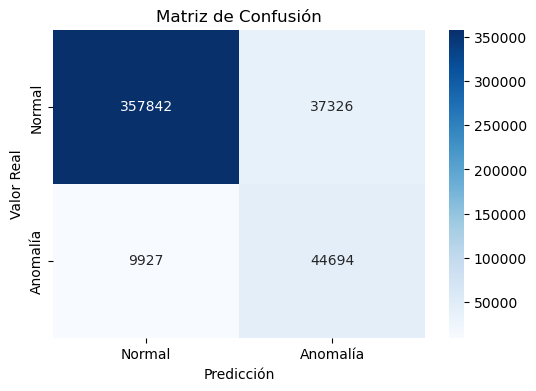

In [39]:
df_resultados = evaluate_model("modelo_completo.pt",test_loader,y_real)

In [40]:
df_resultados

,Predicción,Anomalía,Variables_Anómalas
0,"[0.91539484, 0.14023863, 0.9803701, 0.9661844,...",0,[]
1,"[0.9161259, 0.14041728, 0.98065263, 0.9664655,...",0,[]
2,"[0.91741186, 0.14023872, 0.98118466, 0.9669442...",0,[]
3,"[0.9184379, 0.14009497, 0.9816037, 0.9672824, ...",0,[]
4,"[0.9190795, 0.14006941, 0.98186845, 0.96748376...",0,[]
...,...,...,...
449784,"[0.9196413, 0.14159653, 0.9806749, 0.9657351, ...",0,[]
449785,"[0.9191812, 0.14162657, 0.9804652, 0.9655436, ...",0,[]
449786,"[0.91839665, 0.14165168, 0.98011047, 0.9652216...",0,[]
449787,"[0.9178131, 0.14172152, 0.97984844, 0.96496594...",0,[]


In [41]:
pred_df = pd.DataFrame(df_resultados["Predicción"].to_list(), columns=[f"Pred_{i}" for i in range(len(df_resultados["Predicción"][0]))])

# Concatenar con el DataFrame original
salida_modelo = pd.concat([ pred_df, df_resultados[["Anomalía", "Variables_Anómalas"]]], axis=1)
salida_modelo

,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4,Pred_5,Pred_6,Pred_7,Pred_8,Pred_9,...,Pred_34,Pred_35,Pred_36,Pred_37,Pred_38,Pred_39,Pred_40,Pred_41,Anomalía,Variables_Anómalas
0,0.915395,0.140239,0.980370,0.966184,0.874344,0.969090,-0.000435,0.060870,0.081619,-0.003769,...,0.000493,-0.001010,1.007189,-0.003379,0.006934,0.993190,0.996323,-0.001835,0,[]
1,0.916126,0.140417,0.980653,0.966465,0.874635,0.969518,-0.000420,0.061100,0.081495,-0.003749,...,0.000444,-0.000914,1.007385,-0.003452,0.006877,0.993570,0.996612,-0.001854,0,[]
2,0.917412,0.140239,0.981185,0.966944,0.873827,0.968891,-0.000378,0.061445,0.081011,-0.003538,...,0.000389,-0.000853,1.007820,-0.003606,0.006767,0.994108,0.996978,-0.001884,0,[]
3,0.918438,0.140095,0.981604,0.967282,0.872900,0.967846,-0.000337,0.061694,0.080618,-0.003358,...,0.000336,-0.000808,1.008197,-0.003766,0.006738,0.994478,0.997274,-0.001903,0,[]
4,0.919079,0.140069,0.981868,0.967484,0.872400,0.967125,-0.000310,0.061850,0.080413,-0.003259,...,0.000299,-0.000771,1.008456,-0.003881,0.006745,0.994702,0.997477,-0.001913,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449784,0.919641,0.141597,0.980675,0.965735,0.873011,0.966411,-0.000229,0.061053,0.079488,-0.003038,...,0.000115,-0.000200,1.006389,-0.004135,0.007919,0.992944,0.997182,-0.001894,0,[]
449785,0.919181,0.141627,0.980465,0.965544,0.873255,0.966732,-0.000242,0.060936,0.079638,-0.003102,...,0.000131,-0.000198,1.006172,-0.004085,0.007949,0.992750,0.997044,-0.001891,0,[]
449786,0.918397,0.141652,0.980110,0.965222,0.873461,0.967019,-0.000260,0.060735,0.079873,-0.003209,...,0.000155,-0.000192,1.005815,-0.004019,0.007995,0.992422,0.996808,-0.001888,0,[]
449787,0.917813,0.141722,0.979848,0.964966,0.873722,0.967334,-0.000274,0.060584,0.080060,-0.003293,...,0.000173,-0.000186,1.005547,-0.003967,0.008049,0.992164,0.996642,-0.001883,0,[]


In [44]:
# Crear un diccionario de mapeo entre los nombres Pred_X y los nombres originales
mapeo_nombres = {f"Pred_{i}": X_train.columns[i] for i in range(42)}

# Renombrar las columnas usando el diccionario
salida_modelo.rename(columns=mapeo_nombres, inplace=True)
salida_modelo

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Anomalía,Variables_Anómalas
0,0.915395,0.140239,0.980370,0.966184,0.874344,0.969090,-0.000435,0.060870,0.081619,-0.003769,...,0.000493,-0.001010,1.007189,-0.003379,0.006934,0.993190,0.996323,-0.001835,0,[]
1,0.916126,0.140417,0.980653,0.966465,0.874635,0.969518,-0.000420,0.061100,0.081495,-0.003749,...,0.000444,-0.000914,1.007385,-0.003452,0.006877,0.993570,0.996612,-0.001854,0,[]
2,0.917412,0.140239,0.981185,0.966944,0.873827,0.968891,-0.000378,0.061445,0.081011,-0.003538,...,0.000389,-0.000853,1.007820,-0.003606,0.006767,0.994108,0.996978,-0.001884,0,[]
3,0.918438,0.140095,0.981604,0.967282,0.872900,0.967846,-0.000337,0.061694,0.080618,-0.003358,...,0.000336,-0.000808,1.008197,-0.003766,0.006738,0.994478,0.997274,-0.001903,0,[]
4,0.919079,0.140069,0.981868,0.967484,0.872400,0.967125,-0.000310,0.061850,0.080413,-0.003259,...,0.000299,-0.000771,1.008456,-0.003881,0.006745,0.994702,0.997477,-0.001913,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449784,0.919641,0.141597,0.980675,0.965735,0.873011,0.966411,-0.000229,0.061053,0.079488,-0.003038,...,0.000115,-0.000200,1.006389,-0.004135,0.007919,0.992944,0.997182,-0.001894,0,[]
449785,0.919181,0.141627,0.980465,0.965544,0.873255,0.966732,-0.000242,0.060936,0.079638,-0.003102,...,0.000131,-0.000198,1.006172,-0.004085,0.007949,0.992750,0.997044,-0.001891,0,[]
449786,0.918397,0.141652,0.980110,0.965222,0.873461,0.967019,-0.000260,0.060735,0.079873,-0.003209,...,0.000155,-0.000192,1.005815,-0.004019,0.007995,0.992422,0.996808,-0.001888,0,[]
449787,0.917813,0.141722,0.979848,0.964966,0.873722,0.967334,-0.000274,0.060584,0.080060,-0.003293,...,0.000173,-0.000186,1.005547,-0.003967,0.008049,0.992164,0.996642,-0.001883,0,[]


In [45]:
nombres_variables = salida_modelo.columns[:-2].tolist()

# Convertir los índices en nombres
salida_modelo["Variables_Anómalas"] = salida_modelo["Variables_Anómalas"].apply(lambda indices: [nombres_variables[i] for i in indices])

In [46]:
salida_modelo

,FIT101,LIT101,FIT201,DPIT301,LIT301,LIT401,FIT601,std_FIT101_120,std_LIT101_120,std_FIT201_120,...,MV303_2,MV304_0,MV304_1,MV304_2,P302_1,P302_2,P602_1,P602_2,Anomalía,Variables_Anómalas
0,0.915395,0.140239,0.980370,0.966184,0.874344,0.969090,-0.000435,0.060870,0.081619,-0.003769,...,0.000493,-0.001010,1.007189,-0.003379,0.006934,0.993190,0.996323,-0.001835,0,[]
1,0.916126,0.140417,0.980653,0.966465,0.874635,0.969518,-0.000420,0.061100,0.081495,-0.003749,...,0.000444,-0.000914,1.007385,-0.003452,0.006877,0.993570,0.996612,-0.001854,0,[]
2,0.917412,0.140239,0.981185,0.966944,0.873827,0.968891,-0.000378,0.061445,0.081011,-0.003538,...,0.000389,-0.000853,1.007820,-0.003606,0.006767,0.994108,0.996978,-0.001884,0,[]
3,0.918438,0.140095,0.981604,0.967282,0.872900,0.967846,-0.000337,0.061694,0.080618,-0.003358,...,0.000336,-0.000808,1.008197,-0.003766,0.006738,0.994478,0.997274,-0.001903,0,[]
4,0.919079,0.140069,0.981868,0.967484,0.872400,0.967125,-0.000310,0.061850,0.080413,-0.003259,...,0.000299,-0.000771,1.008456,-0.003881,0.006745,0.994702,0.997477,-0.001913,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449784,0.919641,0.141597,0.980675,0.965735,0.873011,0.966411,-0.000229,0.061053,0.079488,-0.003038,...,0.000115,-0.000200,1.006389,-0.004135,0.007919,0.992944,0.997182,-0.001894,0,[]
449785,0.919181,0.141627,0.980465,0.965544,0.873255,0.966732,-0.000242,0.060936,0.079638,-0.003102,...,0.000131,-0.000198,1.006172,-0.004085,0.007949,0.992750,0.997044,-0.001891,0,[]
449786,0.918397,0.141652,0.980110,0.965222,0.873461,0.967019,-0.000260,0.060735,0.079873,-0.003209,...,0.000155,-0.000192,1.005815,-0.004019,0.007995,0.992422,0.996808,-0.001888,0,[]
449787,0.917813,0.141722,0.979848,0.964966,0.873722,0.967334,-0.000274,0.060584,0.080060,-0.003293,...,0.000173,-0.000186,1.005547,-0.003967,0.008049,0.992164,0.996642,-0.001883,0,[]


In [47]:
salida_modelo.to_csv("salida_modelo.csv", index=False)